# Mathematics for creating a weighted distribution of two probability distributions

Sometimes we want to use a probability distribution of modified Rankin scale (mRS) scores that doesn't exist in the literature. To make the numbers we need, we can create a new distribution by using the weighted sum of two existing distributions. 

Each distribution adds up to 1, so the sum of two distributions without weights is 2. To ensure our final sum is 1, we could just multiply each distribution by 0.5 before summing them. However, we can't assume that using arbitrary weights of 0.5 and 0.5 will give us a realistic final combined distribution. Usually we will know something about the expected final distribution, for example the probability for one of the mRS bins, that will let us choose sensible weights. 

This notebook explains how the required weights are determined. 

# Aims

In this notebook we'll derive formulae for the two weights and show a few examples of how the weights relate to the starting probabilities.

---

## Notebook admin

In [1]:
# Keep notebook cleaner once finalised
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up MatPlotLib
%matplotlib inline

---

## Calculate the weights

To calculate the required weights, only three values are needed: the probability $P(\mathrm{mRS}\leq x)$ for a fixed $x$ in three cases. We need this probability $P_1$ for the first distribution, $P_2$ for the second, and $P_c$ as the target probability for the combined distribution. 

The two probabilities combine using weights $w_1$ and $w_2$:

$$ w_1 P_1 + w_2 P_2 = P_c $$ 

We also know that the weights should sum to 1:

$$ w_1 + w_2 = 1 $$

This ensures that all mRS bins in the combined distribution will sum to 1. For an example of why this is necessary, $P(\mathrm{mRS}\leq 6)=1$ for any distribution, so $P_1=P_2=P_c=1$ and $w_1 \times 1 + w_2 \times 1 = 1$.

By setting $w_1 = 1 - w_2$ and substituting into the equation for $P_c$,

$$
\begin{align*}
(1-w_2)P_1 + w_2 P_2 & = P_c \\ \\
w_2(P_2 - P_1) + P_1 & = P_c \\ \\
w_2 & = \frac{P_c - P_1}{P_2 - P_1} \\
\end{align*}
$$

The weights must sum to 1 and so we know that 

$$ w_1 = 1 - \frac{P_c - P_1}{P_2 - P_1} $$

And since we know the values of $P_1$, $P_2$ and $P_c$, we can now calculate the two weights $w_1$ and $w_2$.

### Example

This example uses values for mRS$\leq$1 from [this notebook](https://github.com/samuel-book/stroke_outcome/blob/main/mRS_datasets_full.ipynb). Taking two known probability distributions, one for LVOs only and the other for both nLVOs and LVOs, we use their weighted combination to find the probability distribution for nLVOs only.

For the untreated population of patients with nLVOs, we expect to see $P_c = 0.46$ (Emberson et al. 2014). We know that, including excess deaths, the combined nLVO and LVO probability $P_1 = 0.3417$ (Lees et al. 2010) and the LVO probability $P_2 = 0.1236$ (Goyal et al. 2016). 

In [4]:
P1 = 0.3417
P2 = 0.1236
Pc = 0.46

We can use these to define the weights:

In [5]:
target_diff  = Pc - P1
current_diff = P2 - P1

w2 = target_diff / current_diff 
w1 = 1 - w2

In [6]:
print(f'Weights: Lees, {w1:.4f}; Goyal, {w2:.4f}')

Weights: Lees, 1.5424; Goyal, -0.5424


And to check that this gives the required target value of $P_c=0.46$:

In [7]:
round(w1*P1 + w2*P2,4) == round(Pc,4)

True

These weights apply to all mRS in the probability distributions, not just to the mRS$\leq$1 bins that were used in the calculation.

---

## What do the weights mean?

To best explain why these weights work, it is easiest to define $w_1$ similarly to how we found $w_2$. By defining $w_2 = 1 - w_1$ and using the equation for $P_c$,

$$
\begin{align*}
w_1 P_1 + (1 - w_1) P_2 & = P_c \\ \\
w_1(P_1 - P_2) + P_2 & = P_c \\ \\
w_1 & = \frac{P_c - P_2}{P_1 - P_2} \\
\end{align*}
$$

Now we'll draw these probabilities on a number line from 0 to 1. 

The following function just sets up the number line plot: 

In [8]:
def plot_number_line(probs):
    ax = plt.subplot()
    
    # Draw a number line: 
    ax.plot([0,1],[0,0], color='k')
    
    # Sort the probabilities and their labels:
    inds  = np.argsort(probs)
    probs = np.array(probs)[inds]
    prob_labels  = np.array([r'$P_1$', r'$P_2$', r'$P_c$'])[inds]
    prob_colours = np.array(['r', 'r', 'b'])[inds]
    
    # Draw vertical markers for probs, including 0 and 1:
    labels  = ['0'] + list(prob_labels)  + ['1']
    colours = ['k'] + list(prob_colours) + ['k']
    for i,prob in enumerate([0]+list(probs)+[1]):
        plt.scatter(prob, 0, marker='|', color=colours[i], s=500)
        plt.annotate(labels[i], xy=(prob, 0.1), color=colours[i], 
                     ha='center', fontsize=14) 
        
    # Draw longest arrow and label:
    draw_horizontal_arrow(probs[0], probs[-1], y=-0.3, 
                          label=prob_labels[-1]+r'$-$'+prob_labels[0],
                          fontsize=12)
    # Draw shorter arrows and labels: 
    for i in np.arange(len(probs)-1,0,-1):
        draw_horizontal_arrow(probs[i], probs[i-1], y=-0.1, 
                              label=prob_labels[i]+r'$-$'+prob_labels[i-1],
                              fontsize=12)
    
    # Other setup:
    ax.set_ylim(-0.45,0.2)
    ax.set_aspect(0.7)
    ax.axis('off')

And this lets us annotate arrows:

In [9]:
def draw_horizontal_arrow(x_left,x_right,y,label='', fontsize=None):
    """
    Draw an arrow <-> with a label below it.
    
    x_left, x_right, y - float or int. The coordinates of the arrow.
    label              - string. Optional label to add above the arrow.
    """
    # Draw a horizontal arrow between x_left and x_right at height y:
    plt.annotate('', xy=(x_left,y), xytext=(x_right,y),
                 arrowprops=dict(arrowstyle='<->'))
    # and add a label for the arrow:
    plt.annotate(label, xy=(0.5*(x_left+x_right),y-0.1), ha='center',
                 fontsize=fontsize)

For our example values, we draw this number line:

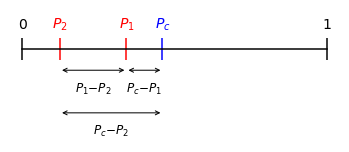

In [10]:
plot_number_line([P1, P2, Pc])
plt.show()

There are three distances between the three probabilities: $P_1-P_2$, $P_c-P_1$, and $P_c-P_2$. These can be written as the following sum:

$$ (P_1-P_2) + (P_c-P_1) = (P_c-P_2) $$

Or, writing the terms in a different order: 

$$ - (P_c-P_2) + (P_c-P_1)  = -(P_1-P_2) $$

Dividing all terms by $-(P_1-P_2)$ gives:

$$
\begin{align*}
\frac{-1}{-1}\left(\frac{P_c-P_2}{P_1-P_2}\right) & +  \frac{P_c-P_1}{-(P_1-P_2)} & = 1 \\
\frac{P_c-P_2}{P_1-P_2} & +  \frac{P_c-P_1}{P_2-P_1} & = 1 
\end{align*}
$$

or in other words:

$$ w_1 + w_2 = 1 $$



So __the weights represent a ratio of the distances of the probabilities $P_1$ and $P_2$ to the target probability $P_c$__. 

---

## More examples

__Example 1:__ Let's define some new probabilities where $P_1$ is close to the target $P_c$ and $P_2$ is far away.

In [11]:
P1 = 0.8; P2 = 0.1; Pc = 0.9

w2 = (Pc - P1) / (P2 - P1) 
w1 = 1 - w2

Print the weights:

In [12]:
print(f'Weights: dist. 1, {w1:.4f}; dist. 2, {w2:.4f}')

Weights: dist. 1, 1.1429; dist. 2, -0.1429


Check the weighted sum equals $P_c$:

In [13]:
w1*P1 + w2*P2 == Pc

True

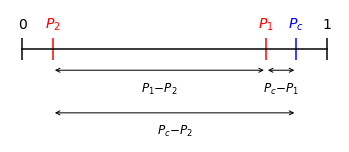

In [14]:
plot_number_line([P1, P2, Pc])
plt.show()

Because $P_2$ is far from $P_c$, the difference $P_c-P_2$ is large and so $w_1$ is large. Similarly, $P_1$ is close to $P_c$ so the difference $P_c-P_1$ is small and $w_2$ is small. The combined distribution uses mostly the $P_1$ value with only a tiny contribution from $P_2$.

The explanations above were given for cases where $P_2<P_1<P_c$, but the same sum works in all cases. 

__Example 2:__ $P_2<P_c<P_1$

In [15]:
P1 = 0.8; P2 = 0.4; Pc = 0.5

w2 = (Pc - P1) / (P2 - P1) 
w1 = 1 - w2

In [16]:
print(f'Weights: dist. 1, {w1:.4f}; dist. 2, {w2:.4f}')

Weights: dist. 1, 0.2500; dist. 2, 0.7500


In [17]:
w1*P1 + w2*P2 == Pc

True

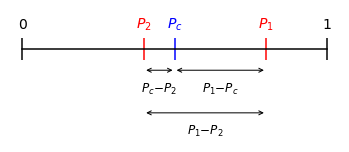

In [18]:
plot_number_line([P1, P2, Pc])
plt.show()

In this case, both of the weights are positive numbers between 0 and 1. 

Rewriting the weights sum:

$$
\begin{align*}
(P_c-P_2) & + (P_1-P_c) & = & (P_1-P_2) \\ \\
\frac{P_c-P_2}{P_1-P_2} & +  \frac{-1}{-1}\left(\frac{P_1-P_c}{P_1-P_2}\right) & = & 1 \\ \\
\frac{P_c-P_2}{P_1-P_2} & +  \frac{P_c-P_1}{P_2-P_1} & = & 1 \\ \\
w_1 & + w_2 & = & 1 
\end{align*}
$$

__Example 3:__ $P_c<P_1<P_2$

In [19]:
P1 = 0.5; P2 = 0.8; Pc = 0.4

w2 = (Pc - P1) / (P2 - P1) 
w1 = 1 - w2

In [20]:
print(f'Weights: dist. 1, {w1:.4f}; dist. 2, {w2:.4f}')

Weights: dist. 1, 1.3333; dist. 2, -0.3333


In [21]:
w1*P1 + w2*P2 == Pc

False

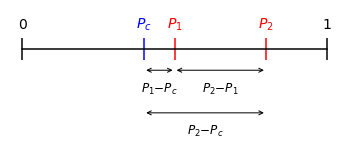

In [22]:
plot_number_line([P1, P2, Pc])
plt.show()

Rewriting the weights sum:

$$
\begin{align*}
(P_1-P_c) & + (P_2-P_1) & = & (P_2-P_c) \\ \\
- (P_2-P_c) & + (P_1-P_c) & = & -(P_2-P_1) \\ \\ 
\frac{P_2-P_c}{P_2-P_1} & + \frac{P_1-P_c}{-(P_2-P_1)} & = & 1 \\ \\
\frac{P_2-P_c}{P_2-P_1}  & + \frac{-1}{-1}\left(\frac{P_c-P_1}{P_2-P_1}\right)  & = & 1 \\ \\
w_1 & + w_2 & = & 1 
\end{align*}
$$

---

## Sign of the weights

Sometimes the weights are positive and sometimes they're negative. In all cases, the weights sum to 1. 

The sign can be predicted by looking at the form of $w_1$ and $w_2$:

$$ w_1 = \frac{P_c - P_2}{P_1 - P_2} $$


$$ w_2 = \frac{P_c - P_1}{P_2 - P_1} $$

Whether each weight is negative or positive depends on the size order of $P_1$, $P_2$, and $P_c$, and whether that makes each difference in the fraction positive or negative. 

---

## References

Emberson J, Lees KR, Lyden P, et al. _Effect of treatment delay, age, and stroke severity on the effects of intravenous thrombolysis with alteplase for acute ischaemic stroke: A meta-analysis of individual patient data from randomised trials_. The Lancet 2014;384:1929–35. doi:10.1016/S0140-6736(14)60584-5


Goyal M, Menon BK, van Zwam WH, et al. _Endovascular thrombectomy after large-vessel ischaemic stroke: a meta-analysis of individual patient data from five randomised trials._ The Lancet 2016;387:1723-1731. doi:10.1016/S0140-6736(16)00163-X


Lees KR, Bluhmki E, von Kummer R, et al. _Time to treatment with intravenous alteplase and outcome in stroke: an updated pooled analysis of ECASS, ATLANTIS, NINDS, and EPITHET trials_. The Lancet 2010;375:1695-703. doi:10.1016/S0140-6736(10)60491-6
